## Avishkar Dinesh Chothwe
# Roll no: 282029
# PRN no: 22310789
# Assignment No: 7 -

 Q .  Assignment on Classification technique Every year many students give the GRE
exam to get admission in foreign Universities. The data set contains GRE
Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of
5), Statement of Purpose strength (out of 5), Letter of Recommendation
strength (out of 5), Undergraduate GPA (out of 10), Research Experience
(0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data
Set: https://www.kaggle.com/mohansacharya/graduate-admissions The
counselor of the firm is supposed check whether the student will get an
admission or not based on his/her GRE score and Academic Score. So to
help the counselor to take appropriate decisions build a machine learning
model classifier using Decision tree to predict whether a student will get
admission or not.         
a) Apply Data pre-processing (Label Encoding, Data Transformation....)
techniques if necessary.    
b) Perform data-preparation (Train-Test Split)    
c) Apply Machine Learning Algorithm      
d) Evaluate Model.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load dataset
df = pd.read_csv("Admission_Predict.csv")

# Step 1: Data Preprocessing

In [3]:
# Drop 'Serial No.'
df.drop(columns=["Serial No."], inplace=True)

In [4]:
# Convert 'Chance of Admit ' into binary target variable
df["Admitted"] = (df["Chance of Admit "] >= 0.75).astype(int)
df.drop(columns=["Chance of Admit "], inplace=True)

# Step 2: Exploratory Data Analysis (EDA)

In [5]:
# Check for null values
print("Null values:\n", df.isnull().sum())

Null values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64


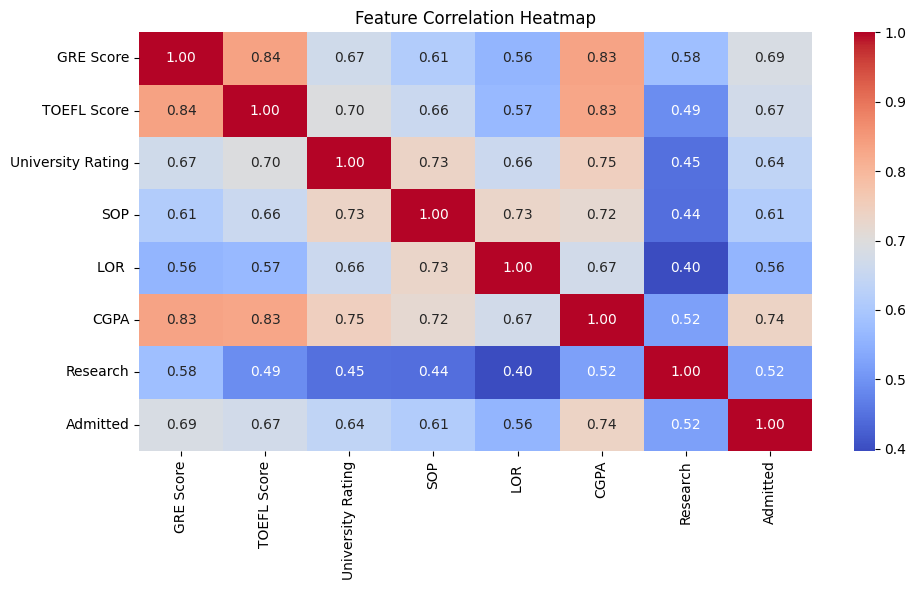

In [6]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 3: Modeling with Decision Tree

In [7]:
# Use only 'GRE Score' and 'CGPA' for prediction
X = df[["GRE Score", "CGPA"]]
y = df["Admitted"]

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Predictions
y_pred = clf.predict(X_test)

In [11]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.825
Confusion Matrix:
 [[36 11]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        47
           1       0.73      0.91      0.81        33

    accuracy                           0.82        80
   macro avg       0.83      0.84      0.82        80
weighted avg       0.84      0.82      0.83        80



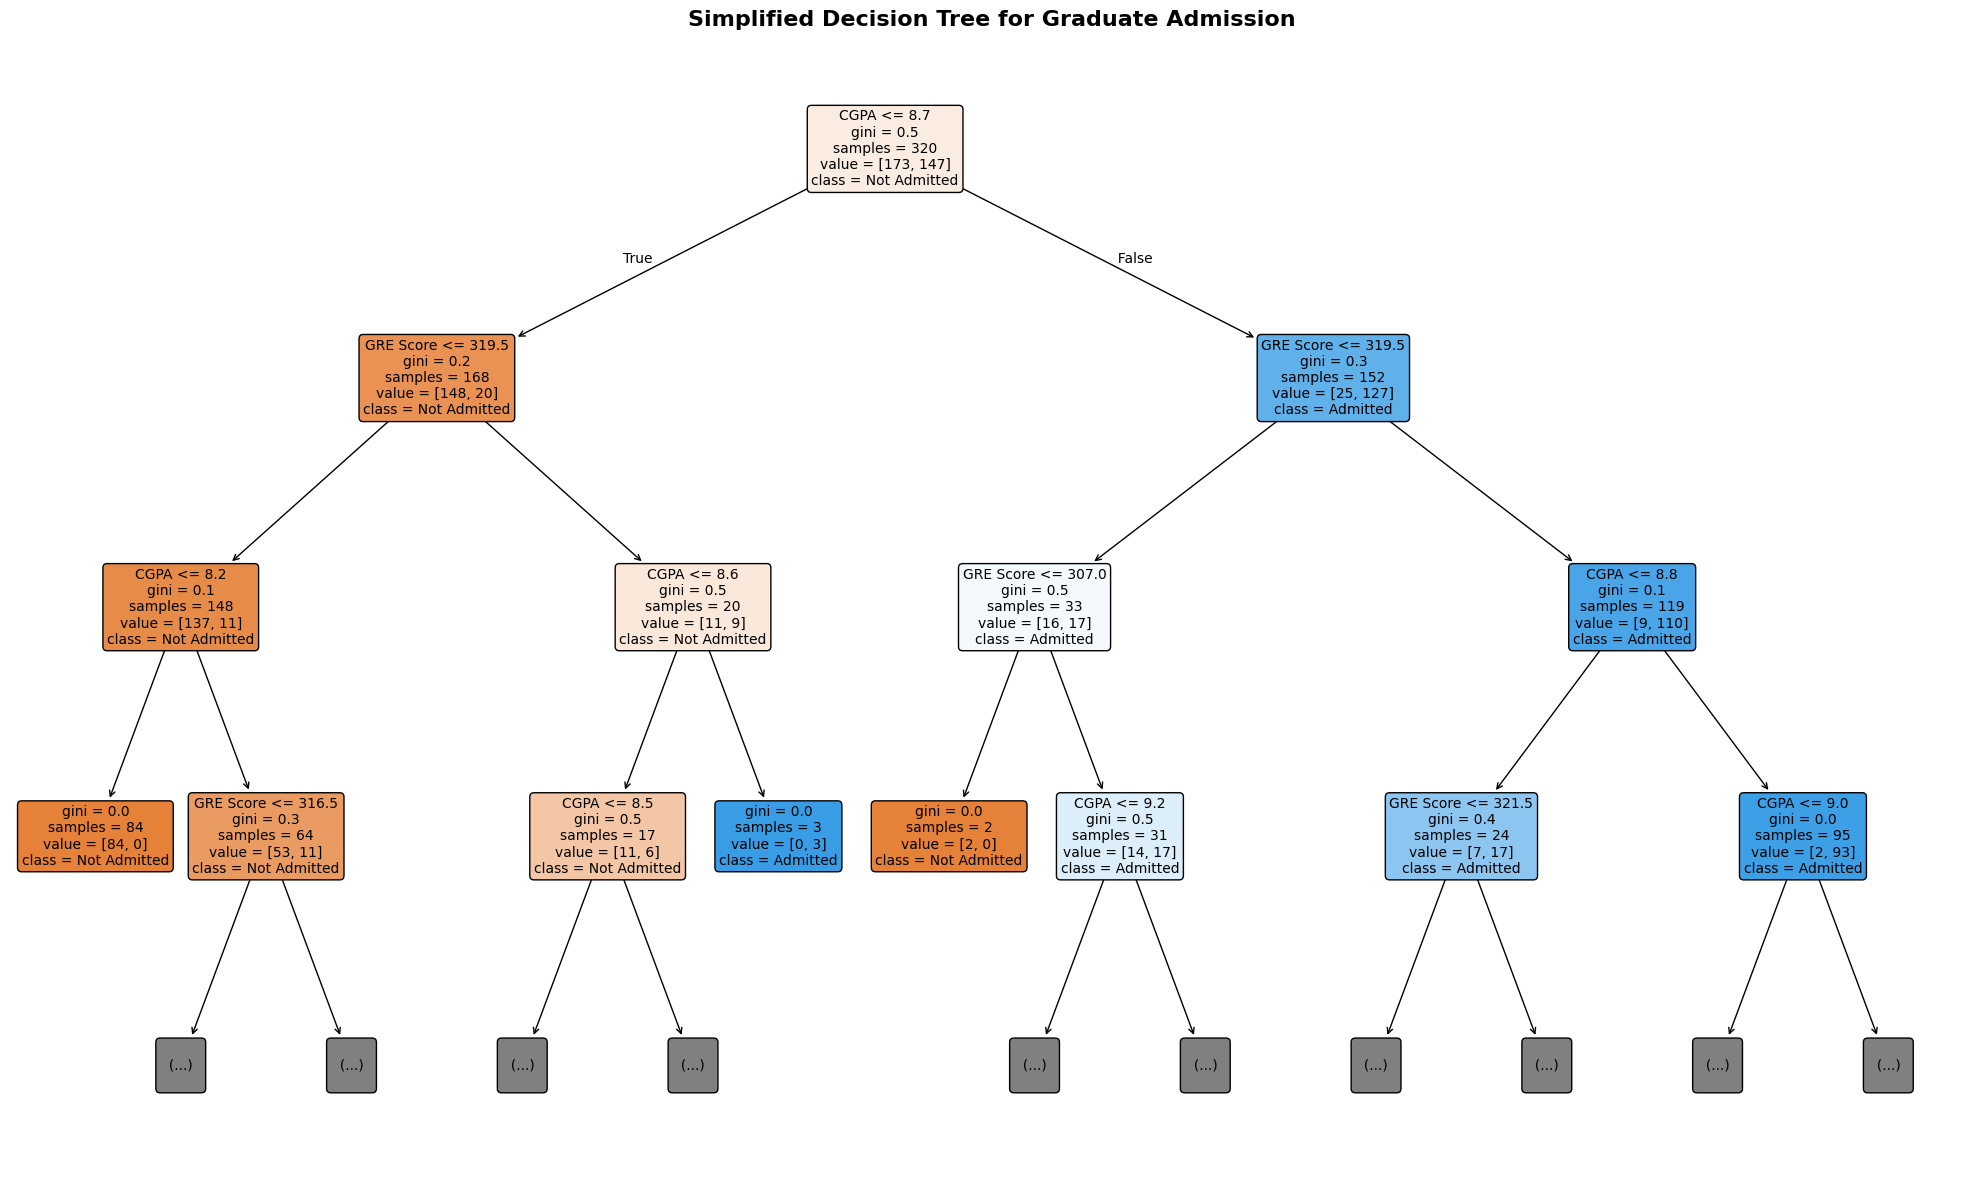

In [15]:
# Decision Tree Plot
plt.figure(figsize=(20, 12), dpi=100)  # Adjusted for clarity
plot_tree(clf,
          feature_names=["GRE Score", "CGPA"],
          class_names=["Not Admitted", "Admitted"],
          filled=True,
          rounded=True,
          precision=1,
          fontsize=10,
          max_depth=3)  # Limit depth for a simplified, readable tree
plt.title("Simplified Decision Tree for Graduate Admission", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


